# ML opdracht 5


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ML-les-5" data-toc-modified-id="ML-les-5-1">ML les 5</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1">Dataset</a></span></li><li><span><a href="#Analyse-Probleem" data-toc-modified-id="Analyse-Probleem-1.2">Analyse Probleem</a></span><ul class="toc-item"><li><span><a href="#Wat-is-het-probleem" data-toc-modified-id="Wat-is-het-probleem-1.2.1">Wat is het probleem</a></span></li><li><span><a href="#Dimensie-dataset" data-toc-modified-id="Dimensie-dataset-1.2.2">Dimensie dataset</a></span></li><li><span><a href="#Soorten-data/features" data-toc-modified-id="Soorten-data/features-1.2.3">Soorten data/features</a></span></li></ul></li><li><span><a href="#Voorspelling" data-toc-modified-id="Voorspelling-1.3">Voorspelling</a></span><ul class="toc-item"><li><span><a href="#Welke-classifier-zal-het-beste-zijn-en-waarom?" data-toc-modified-id="Welke-classifier-zal-het-beste-zijn-en-waarom?-1.3.1">Welke classifier zal het beste zijn en waarom?</a></span></li><li><span><a href="#Welke-hyperparameters-zijn-relevant-en-waarom?" data-toc-modified-id="Welke-hyperparameters-zijn-relevant-en-waarom?-1.3.2">Welke hyperparameters zijn relevant en waarom?</a></span></li></ul></li><li><span><a href="#Methoden" data-toc-modified-id="Methoden-1.4">Methoden</a></span><ul class="toc-item"><li><span><a href="#Welke-preprocessing-stappen-zijn-nodig?" data-toc-modified-id="Welke-preprocessing-stappen-zijn-nodig?-1.4.1">Welke preprocessing stappen zijn nodig?</a></span></li><li><span><a href="#Welke-classifiers-ga-je-vergelijken?-(Minimaal-2-per-dataset)" data-toc-modified-id="Welke-classifiers-ga-je-vergelijken?-(Minimaal-2-per-dataset)-1.4.2">Welke classifiers ga je vergelijken? (Minimaal 2 per dataset)</a></span></li><li><span><a href="#Welke-performance-metric-is-passend?" data-toc-modified-id="Welke-performance-metric-is-passend?-1.4.3">Welke performance metric is passend?</a></span></li></ul></li><li><span><a href="#Resultaten" data-toc-modified-id="Resultaten-1.5">Resultaten</a></span><ul class="toc-item"><li><span><a href="#Let-op:-Niet-alleen-beste-resultaat-geven,-het-gaat-juist-ook-om-de-vergelijking/verbetering!" data-toc-modified-id="Let-op:-Niet-alleen-beste-resultaat-geven,-het-gaat-juist-ook-om-de-vergelijking/verbetering!-1.5.1">Let op: Niet alleen beste resultaat geven, het gaat juist ook om de vergelijking/verbetering!</a></span></li><li><span><a href="#Minimaal-1-visualisatie/plotje-per-dataset." data-toc-modified-id="Minimaal-1-visualisatie/plotje-per-dataset.-1.5.2">Minimaal 1 visualisatie/plotje per dataset.</a></span></li></ul></li><li><span><a href="#Evaluatie/conclusie" data-toc-modified-id="Evaluatie/conclusie-1.6">Evaluatie/conclusie</a></span><ul class="toc-item"><li><span><a href="#Welke-classifier-leverde-beste-resultaat-op?" data-toc-modified-id="Welke-classifier-leverde-beste-resultaat-op?-1.6.1">Welke classifier leverde beste resultaat op?</a></span></li><li><span><a href="#Klopt-dit-met-je-voorspelling?-Waarom-wel/niet?" data-toc-modified-id="Klopt-dit-met-je-voorspelling?-Waarom-wel/niet?-1.6.2">Klopt dit met je voorspelling? Waarom wel/niet?</a></span></li></ul></li><li><span><a href="#Literatuurverwijzingen" data-toc-modified-id="Literatuurverwijzingen-1.7">Literatuurverwijzingen</a></span></li></ul></li></ul></div>

## Dataset

##### All imports

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier

#####  Importing the dataset

In [2]:
data = pd.read_csv("creditcard.csv")
## Naar dataframe

## Analyse Probleem

"It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase."

### Wat is het probleem
Hierboven zie je een quote van de dataset die geleverd is. De dataset zijn credit card transacties die deels fraudulent zijn. De transacties waar fraude gepleegd wordt moet zo goed mogelijk gedetecteerd worden.

### Dimensie dataset

In [3]:
data.shape

(284807, 31)

Zoals de code hieronder laat zien is het een grote dataset met gemiddeld 284 duizend rijen en 31 columns.

### Soorten data/features

In [4]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


####  Eerste oogopslag
Zonder informatie is het lastig te zien wat alle features zijn in deze dataset. Op eerste oogopslag ziet de data er gesorteerd uit op de tijd feature hierna zijn er heel veel VXX waarden die niet duidelijk zijn. Tot slot zijn er nog 2 features genaamd **Amount** en **Class**. Amount is waarschijnlijk de hoeveelheid van de transactie is en de Class feature kan niet in een keer herkend worden.

#### Geleverde documentatie
In de documentatie die geleverd wordt bij de dataset worden de features al duidelijker. Hieronder zijn de features uitgelegd:
**Time:** Time is de tijd in seconden tussen elke transactie en de eerste transactie in de dataset.

**Vxx:** Vanwege privacy redenen mogen deze kenmerken niet duidelijk gemaakt worden maar zijn mogelijk nog steeds bruikbaar.

**Amount:** Dit is zoals bij de eerste oogopslag de hoeveelheid van de transactie.

**Class:** De waardes die in class gegeven worden zijn 1 en 0, als de waarde 1 is wordt de waarde als fraude gezien. Als de waarde 0 is wordt het gezien als een normale transactie.

## Voorspelling
Mijn voorspelling is dat de Vxx waarden degelijk belangrijk zijn en mogelijk unsupervised leaning gedaan moet worden.
Hiervoor moet er wel gekeken worden naar mogelijke correlates of bijzonderheden in de dataset.

### Welke classifier zal het beste zijn en waarom?
Omdat het over het plegen van fraude gaat en er heel veel features zijn, is het een goede kans om de **SVM** classifier te gebruiken voor deze dataset. Daarnaast  

### Visualisaties


#### Data gathering

In [5]:
positive = data[data["Class"] == 1]
negative = data[data["Class"] == 0]

print('positive values', len(positive))
print('negative values', len(negative))

positive values 492
negative values 284315


### Welke hyperparameters zijn relevant en waarom? 
De **Time** en **Amount** kunnen heel relevant zijn. Omdat fraude vaak in grote getalen gepleegd wordt of in meerdere
kleinere hoeveelheden over een korte tijdspan.

Aan de hand van de visualizaties

## Methoden

### Welke preprocessing stappen zijn nodig? 


Ten eerste zijn we op zoek of er null waarden zijn

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Welke classifiers ga je vergelijken? (Minimaal 2 per dataset) 
Vanwege de grote hoeveelheid features vergeleken met de andere datasets, is het een goede mogelijkheid om de SVM te
gebruiken. Daarnaast



### Welke performance metric is passend?

## Resultaten


In [7]:
x_data = data.drop(columns={"Class","Time"})
y_data = data["Class"]

print(x_data.head())
print(y_data.head())
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,train_size=0.8)


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Amount  
0  0.0

## Clustering with k-means
De reden dat ik k-means++ gebruik is voor het versnellen van de functie. Kmeans zelf is heel traag met het lezen van de
data heb ik gezien uit voorgaande tests

In [8]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans_data = kmeans.fit_transform(X_train)

## Application of PCA

In [9]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)

In [10]:
pca_kmeans_data = pca.fit_transform(kmeans_data,)

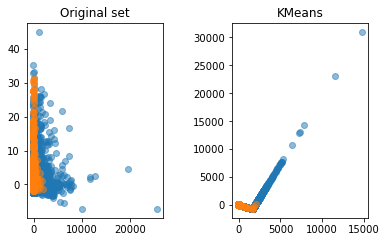

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')
ax2.scatter(pca_kmeans_data[y_train == 0, 0], pca_kmeans_data[y_train == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(pca_kmeans_data[y_train == 1, 0], pca_kmeans_data[y_train == 1, 1],
            label="Class #1", alpha=0.5)
ax2.set_title('KMeans')

plt.tight_layout(pad=3)
plt.show()



## Bevindingen

In [13]:
xgb_m = XGBClassifier(random_state=2)
history = xgb_m.fit(X_train, y_train)


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
pred = xgb_m.predict(X_test)

In [15]:
xgb_auc_prob = xgb_m.predict_proba(X_test)[::,1]
print(xgb_auc_prob)
print(pred)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  pred)
xgb_auc = auc(fpr_xgb, tpr_xgb)

[2.0141327e-07 5.6303211e-06 2.4802957e-06 ... 6.0410679e-07 1.3293934e-04
 4.0758516e-07]
[0 0 0 ... 0 0 0]


In [16]:

# define the model evaluation the metric
# svmc = svm.SVC(kernel='linear', C=1,cache_size=7000)
#
# svm = GridSearchCV(SVC(probability=True), {'kernel':['rbf','poly'],'gamma': [1e-3,  1e-4], 'C':[1,10,100,1000]}, cv=5,
#                    scoring= '%s_macro'%'precision')
# svm.fit(kmeans_data, y_train)
#
# means = svm.cv_results_['mean_test_score']
# stds = svm.cv_results_['std_test_score']
#
# pred = svmc.predict(X_test)
# print("Best Results")
# y_pred_svm =svm.predict(X_test)
# print(svm.best_params_)
#Gebruik buiten notebook voor meer rekenkracht
# svmc, y_pred_svm = run_svm_grid_search(kmeans_data, X_test, y_train)

In [17]:
modelKNN = KNeighborsRegressor(n_neighbors=9)

modelKNN.fit(X_train, y_train)

knn_pred = modelKNN.predict(X_test)

In [18]:
print(metrics.accuracy_score(y_test, knn_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(knn_pred, y_test, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr_xgb, tpr_xgb, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## Evaluatie/conclusie
De XGBoost werkte super goed als ensemble model. Het resultaat van 90% had ik persoonlijk niet verwacht.

## Literatuurverwijzingen

sckit learn:
https://machinelearningmastery.com/imbalanced-classification-with-the-fraudulent-credit-card-transactions-dataset/